# Initial Impression

In [184]:
### Importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(color_codes=True)
from scipy import stats
import statistics

In [71]:
### Loading the training data

df_train = pd.read_csv("df_train.csv")

In [72]:
### Size of the training data

df_train.shape

(149, 10)

In [73]:
### Out features

df_train.columns

Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'type'], dtype='object')

In [74]:
### Initial impression of the first 10 observations of the training data

df_train.head(10)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,type
0,1.51839,12.85,3.67,1.24,72.57,0.62,8.68,0.00,0.35,2
1,1.52081,13.78,2.28,1.43,71.99,0.49,9.85,0.00,0.17,2
2,1.51708,13.72,3.68,1.81,72.06,0.64,7.88,0.00,0.00,2
3,1.52739,11.02,0.00,0.75,73.08,0.00,14.96,0.00,0.00,2
4,1.52210,13.73,3.84,0.72,71.76,0.17,9.74,0.00,0.00,1
5,1.51631,13.34,3.57,1.57,72.87,0.61,7.89,0.00,0.00,2
6,1.51743,12.20,3.25,1.16,73.55,0.62,8.90,0.00,0.24,2
7,1.51915,12.73,1.85,1.86,72.69,0.60,10.09,0.00,0.00,5
8,1.51645,13.44,3.61,1.54,72.39,0.66,8.03,0.00,0.00,2
9,1.51683,14.56,0.00,1.98,73.29,0.00,8.52,1.57,0.07,7


In [75]:
### Impression of the last 10 observations in the training data

df_train.tail(10)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,type
139,1.51409,14.25,3.09,2.08,72.28,1.10,7.08,0.00,0.00,2
140,1.52369,13.44,0.00,1.58,72.22,0.32,12.24,0.00,0.00,5
141,1.52099,13.69,3.59,1.12,71.96,0.09,9.40,0.00,0.00,1
142,1.51829,13.24,3.90,1.41,72.33,0.55,8.31,0.00,0.10,2
143,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.00,1
144,1.51755,12.71,3.42,1.20,73.20,0.59,8.64,0.00,0.00,1
145,1.51800,13.71,3.93,1.54,71.81,0.54,8.21,0.00,0.15,2
146,1.52365,15.79,1.83,1.31,70.43,0.31,8.61,1.68,0.00,7
147,1.51571,12.72,3.46,1.56,73.20,0.67,8.09,0.00,0.24,1
148,1.51786,12.73,3.43,1.19,72.95,0.62,8.76,0.00,0.30,1


In [76]:
### We don't have any NaN values in our data

df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      149 non-null    float64
 1   Na      149 non-null    float64
 2   Mg      149 non-null    float64
 3   Al      149 non-null    float64
 4   Si      149 non-null    float64
 5   K       149 non-null    float64
 6   Ca      149 non-null    float64
 7   Ba      149 non-null    float64
 8   Fe      149 non-null    float64
 9   type    149 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 11.8 KB


In [77]:
### Confirmed here as well

df_train.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
type    0
dtype: int64

In [78]:
### Checking for unique values, we can see we have 6 target classes

df_train.nunique()

RI      134
Na      105
Mg       75
Al       99
Si      104
K        56
Ca      113
Ba       26
Fe       27
type      6
dtype: int64

In [79]:
### Class 6, 9, and 3 are underpresented

df_train['type'].value_counts(normalize=False,ascending=True)

6     6
5     9
3    12
7    20
1    49
2    53
Name: type, dtype: int64

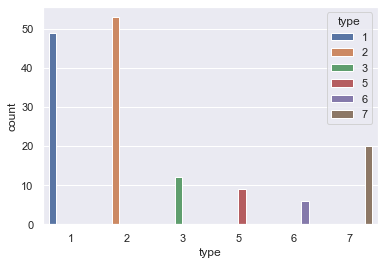

In [85]:
### Visualizing the classes

sns.countplot(x = 'type', hue = 'type', data = df_train);

<AxesSubplot:>

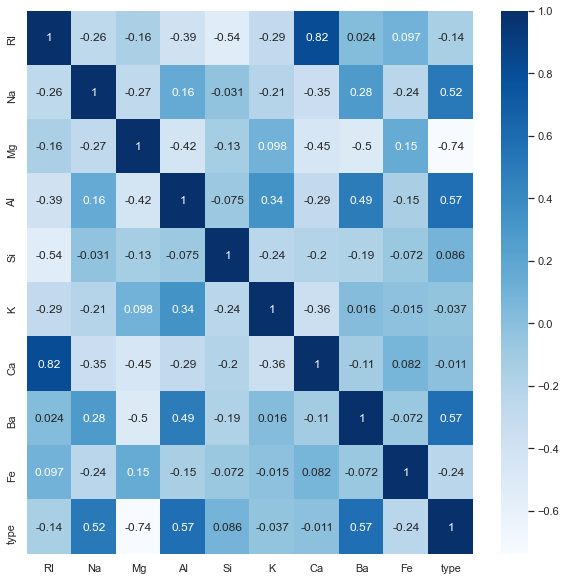

In [25]:
### Checking for correlation of our features

plt.figure(figsize=(10,10))
sns.heatmap(df_train.corr(), cbar=True, annot=True, cmap='Blues')

### Positive Correlation
* Ba and AI
* Ca and RI


### Negative Correlation
* Si and RI
* Mg and Ba
* Ri and Si


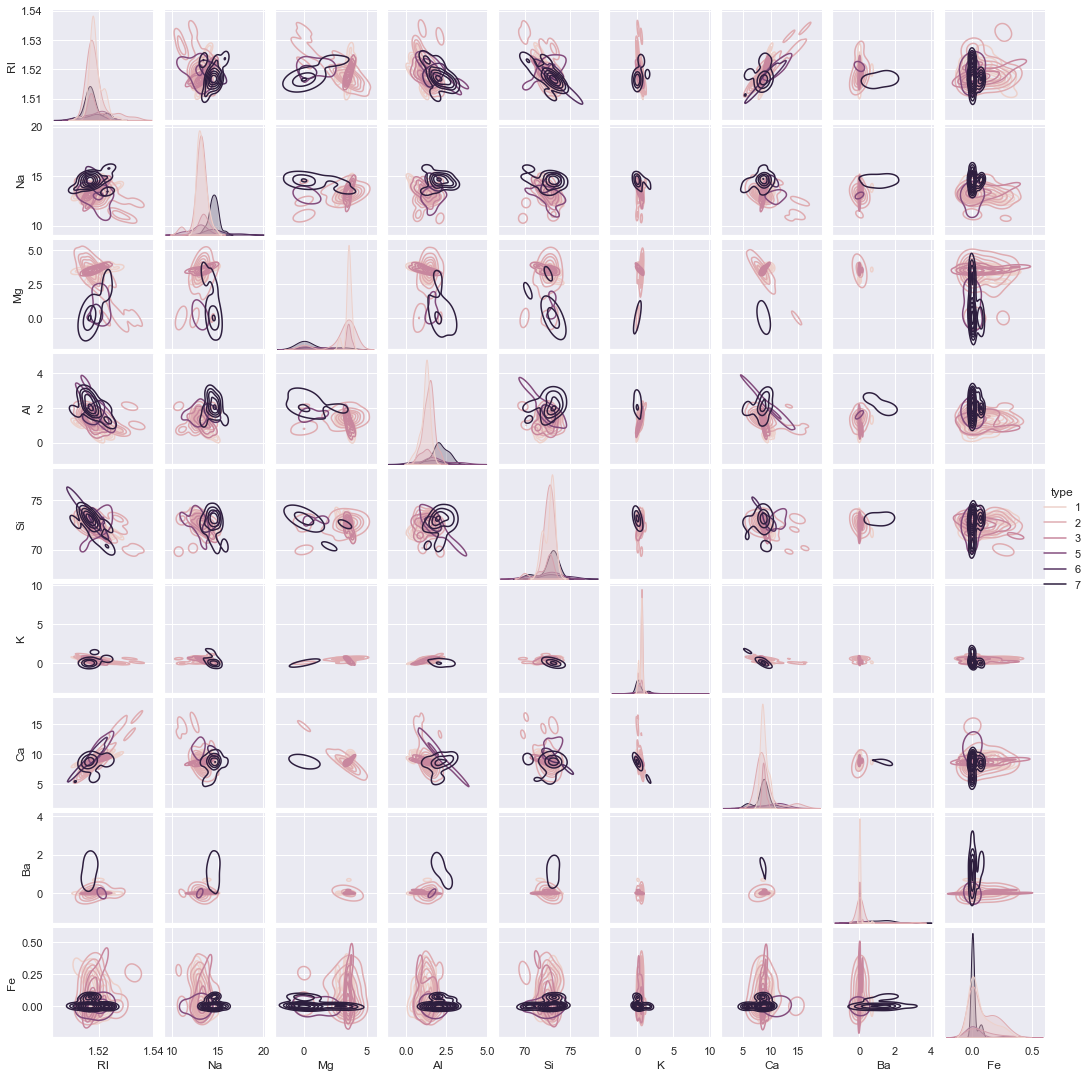

In [121]:
kde = sns.pairplot(df_train, hue = 'type', kind='kde')
kde.fig.set_size_inches(15,15)

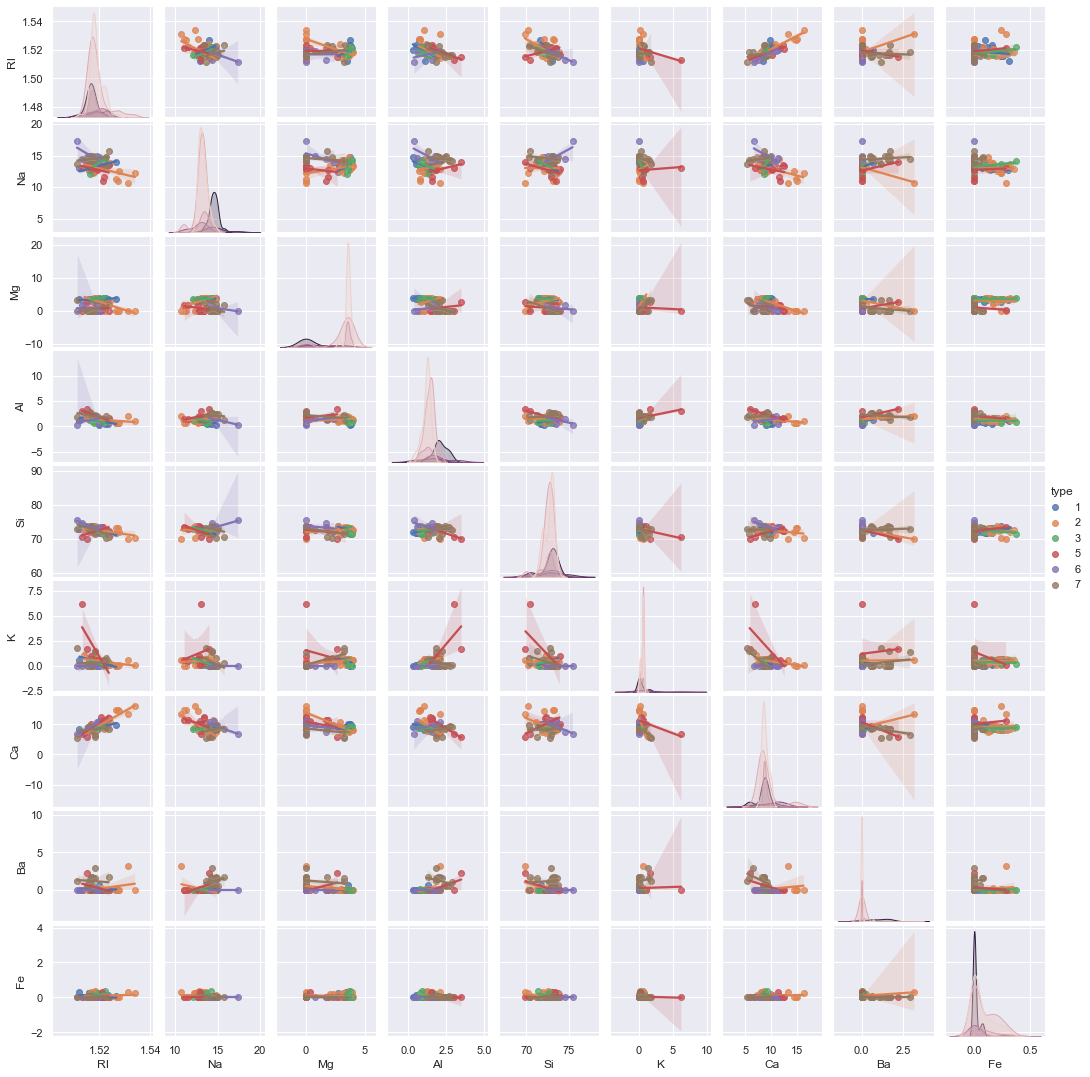

In [122]:
reg = sns.pairplot(df_train, hue = 'type', kind='reg')
reg.fig.set_size_inches(15,15)

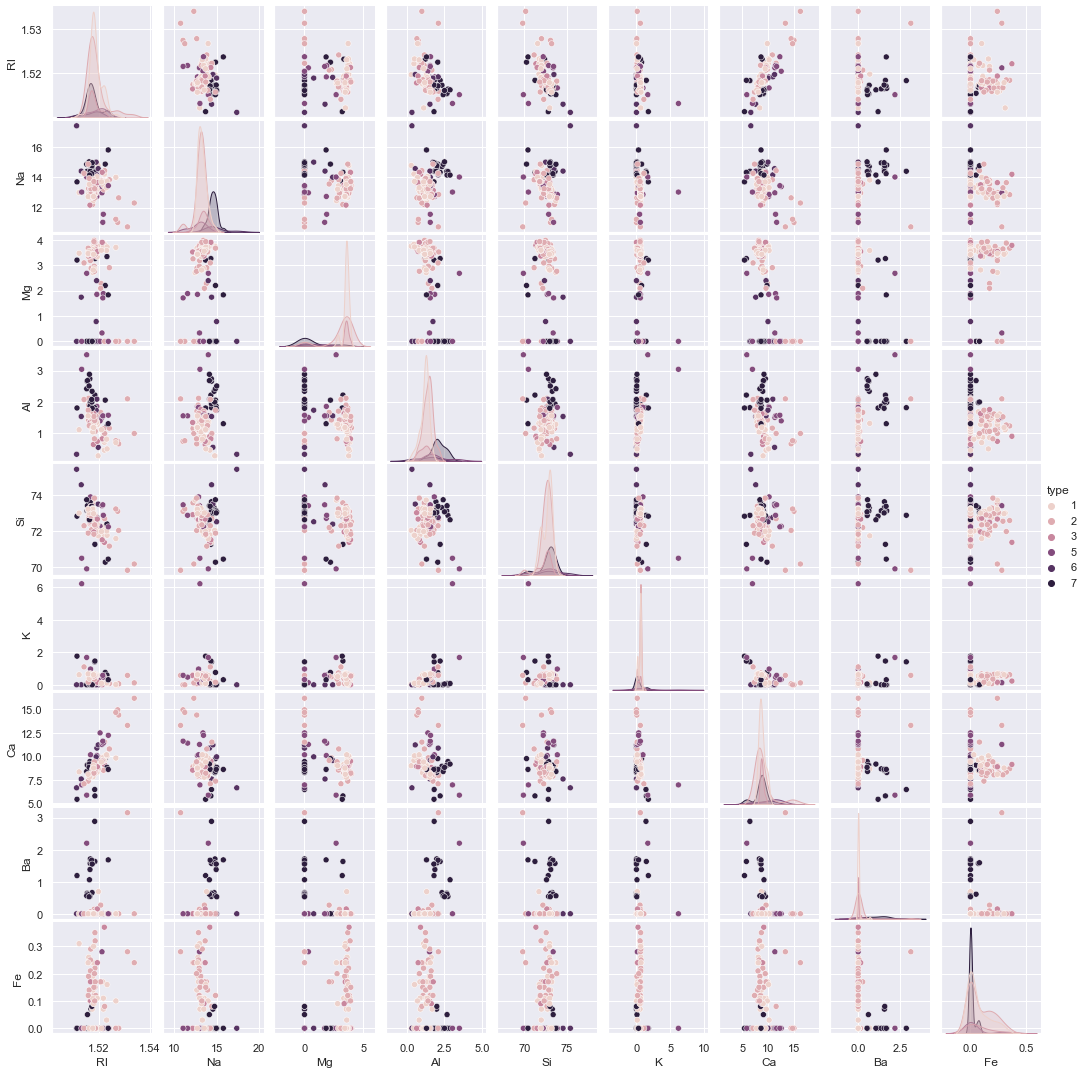

In [123]:
scatter = sns.pairplot(df_train, hue = 'type', kind='scatter')
scatter.fig.set_size_inches(15,15)

## Measuring central tendency, dispersion and skewness

In [268]:
### Overview of mean, std, interquartiles ranges, min and max values

df_train.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,type
count,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000
mean,1.518427,13.420470,2.724765,1.434698,72.623758,0.485168,8.924295,0.199799,0.061611,2.765101
std,0.003213,0.863283,1.422193,0.506470,0.783145,0.569998,1.511192,0.553319,0.097642,2.096939
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516630,12.930000,2.280000,1.170000,72.280000,0.130000,8.220000,0.000000,0.000000,1.000000
50%,1.517690,13.300000,3.490000,1.360000,72.780000,0.550000,8.590000,0.000000,0.000000,2.000000
75%,1.519160,13.830000,3.610000,1.620000,73.050000,0.610000,9.140000,0.000000,0.110000,3.000000
max,1.533930,17.380000,3.980000,3.500000,75.410000,6.210000,16.190000,3.150000,0.370000,7.000000


In [269]:
### Generally std is prefered to variance as var is hard to interpret but it does provide the closeness to the mean
### Mg and Ca have higher variance and std

var = df_train.var()

In [270]:
print('The variance of the training data is:', '\n',var)

The variance of the training data is: 
 RI      0.000010
Na      0.745257
Mg      2.022632
Al      0.256512
Si      0.613316
K       0.324898
Ca      2.283700
Ba      0.306161
Fe      0.009534
type    4.397152
dtype: float64


In [ ]:
### Calculating the mode, that is, the most likely value of a given feature
### Calculating the median value

mode = df_train.mode()
median = df_train.median()

In [263]:
print('The mode of the training data is:', '\n', mode)

The mode of the training data is: 
         RI     Na   Mg    Al     Si    K    Ca   Ba   Fe  type
0  1.51645  13.21  0.0  1.54  72.86  0.0  8.03  0.0  0.0   2.0
1      NaN    NaN  NaN   NaN  72.99  NaN   NaN  NaN  NaN   NaN


In [266]:
print('The media value of the training data is:', '\n', median)

The media value of the training data is: 
 RI       1.51769
Na      13.30000
Mg       3.49000
Al       1.36000
Si      72.78000
K        0.55000
Ca       8.59000
Ba       0.00000
Fe       0.00000
type     2.00000
dtype: float64


### RI feature

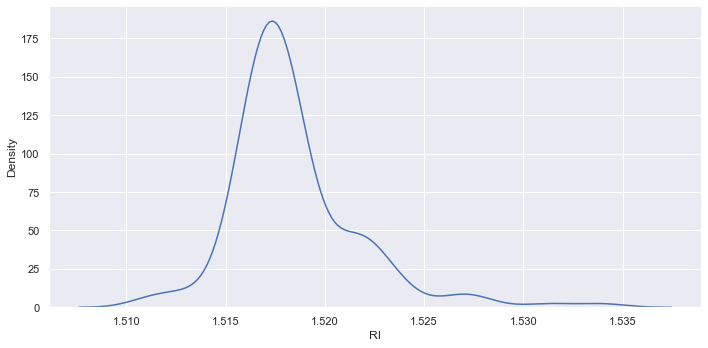

In [28]:
### Observing the distribution of the values in RI feature
### Positively skewed

df_train['RI']

sns.displot(data=df_train,x="RI",kind="kde",aspect=2)

<AxesSubplot:xlabel='RI'>

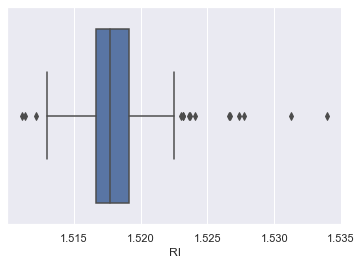

In [38]:
sns.boxplot(x=df_train['RI'])

### Na feature

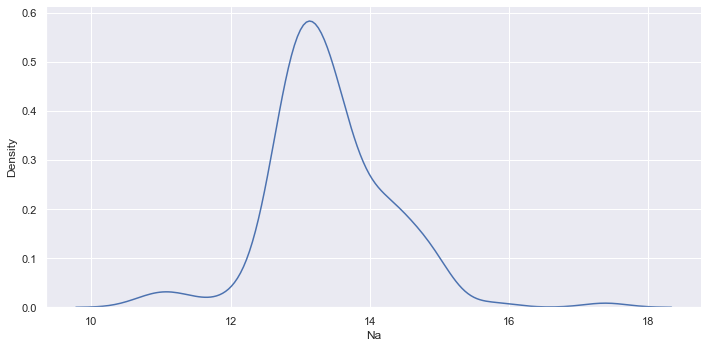

In [30]:
### Observing the distribution of the v### RI featurealues in Na feature

sns.displot(data=df_train,x="Na",kind="kde",aspect=2)

<AxesSubplot:xlabel='Na'>

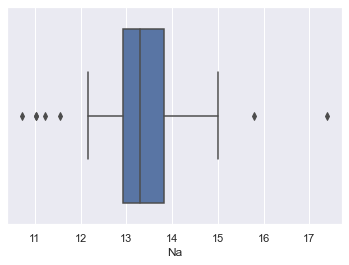

In [39]:
sns.boxplot(x=df_train['Na'])

### Mg feature

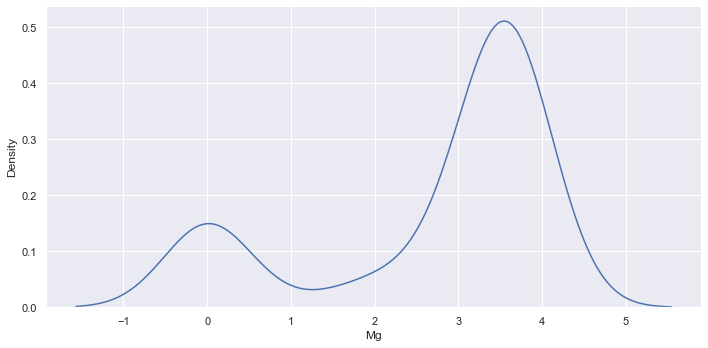

In [31]:
### Observing the distribution of the values in Mg feature
### Negatively skewed

sns.displot(data=df_train,x="Mg",kind="kde",aspect=2)

<AxesSubplot:xlabel='Mg'>

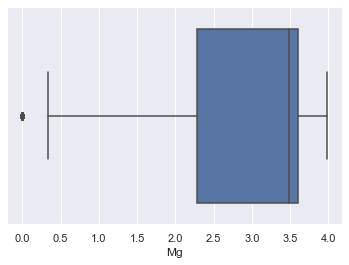

In [40]:
sns.boxplot(x=df_train['Mg'])

### Al feature

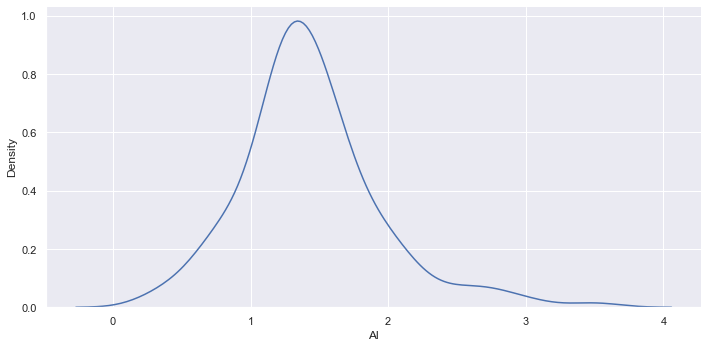

In [32]:
### Observing the distribution of the values in Al feature
### Positively skewed

sns.displot(data=df_train,x="Al",kind="kde",aspect=2)

<AxesSubplot:xlabel='Al'>

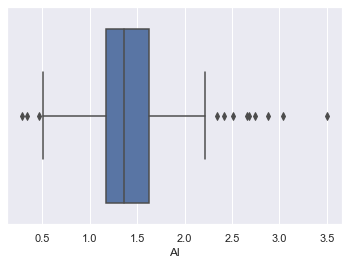

In [41]:
sns.boxplot(x=df_train['Al'])

### Si feature

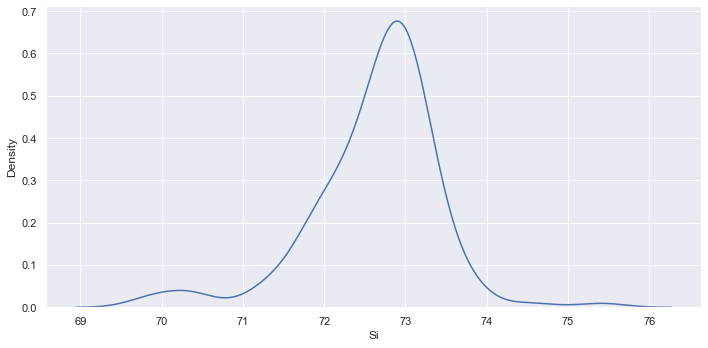

In [33]:
### Observing the distribution of the values in Si feature

sns.displot(data=df_train,x="Si",kind="kde",aspect=2)

<AxesSubplot:xlabel='Si'>

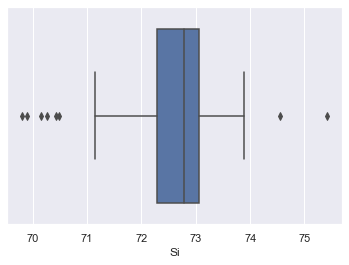

In [42]:
sns.boxplot(x=df_train['Si'])

### K feature

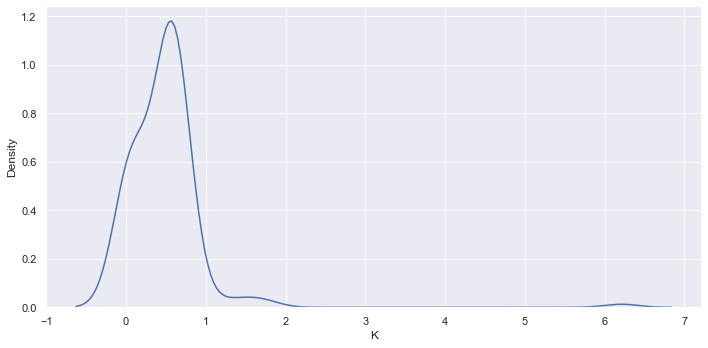

In [34]:
### Observing the distribution of the values in K feature
### Positively skewed

sns.displot(data=df_train,x="K",kind="kde",aspect=2)

<AxesSubplot:xlabel='K'>

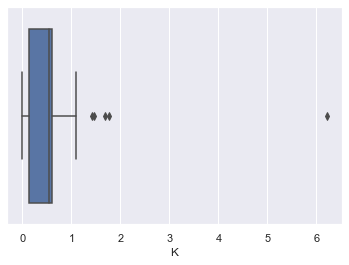

In [43]:
sns.boxplot(x=df_train['K'])

### Ca feature

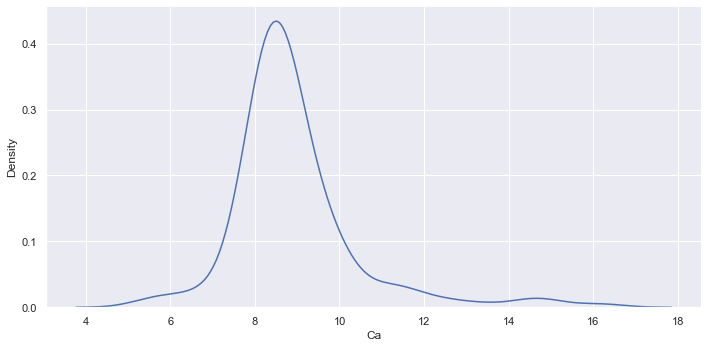

In [35]:
### Observing the distribution of the values in Ca feature
### Positively skewed

sns.displot(data=df_train,x="Ca",kind="kde",aspect=2)

<AxesSubplot:xlabel='Ca'>

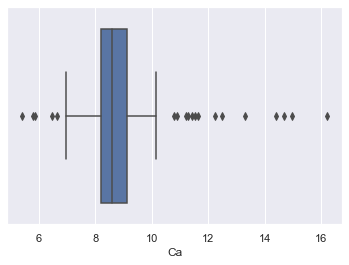

In [44]:
sns.boxplot(x=df_train['Ca'])

### Ba feature

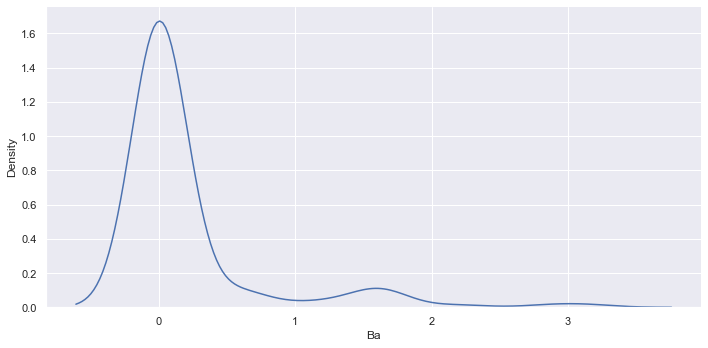

In [36]:
### Observing the distribution of the values in Ba feature
### Positively skewed

sns.displot(data=df_train,x="Ba### RI feature",kind="kde",aspect=2)

<AxesSubplot:xlabel='Ba'>

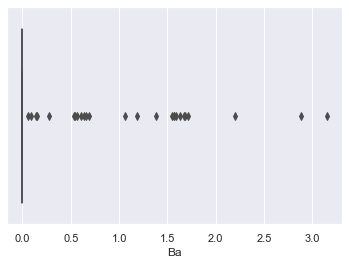

In [45]:
sns.boxplot(x=df_train['Ba'])

### Fe feature

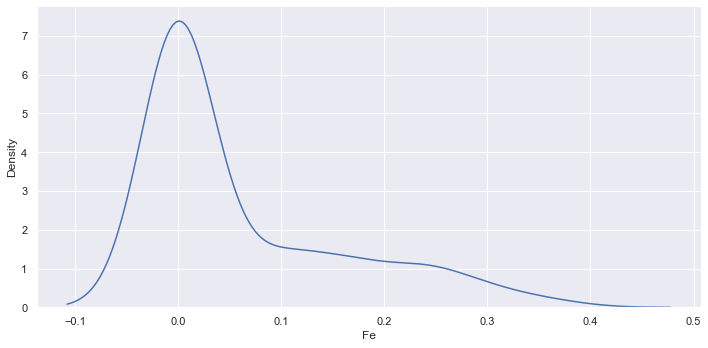

In [37]:
### Observing the distribution of the values in Fe feature
### Positively skewed

sns.displot(data=df_train,x="Fe",kind="kde",aspect=2)

<AxesSubplot:xlabel='Fe'>

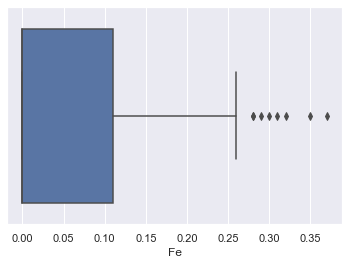

In [46]:
sns.boxplot(x=df_train['Fe'])

### PCA

Performing PCA, aka dimentionality reduction can help us in determining if there is any features that are more important, we will try and run our models with and without PCA to see the result in prediction and accuracy. It will also give us an idea of which features are more important. 

Prior to performing PCA, we need to standardize the data using the mean and std values. 

Performing PCA might be usefull as our features are slightly correlated.

In [388]:
### Import PCA and Scaler

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing 

In [376]:
features = ['RI','Na','Mg','Al','Si','K','Ca','Ba','Fe']
x = df_train.loc[:,features].values

In [377]:
x_stand = StandardScaler().fit_transform(x)

In [378]:
pca = PCA(n_components = 8)

In [379]:
PrincipalComponenets = pca.fit_transform(x_stand)

In [380]:
Principal_Train_DF = pd.DataFrame(data = PrincipalComponenets, columns = ['PCA_1','PCA_2','PCA_3','PCA_4','PCA_5','PCA_6','PCA_7','PCA_8'])

In [381]:
final_train_df = pd.concat([Principal_Train_DF, df_train['type']], axis= 1)

In [382]:
final_train_df 

,PCA_1,PCA_2,PCA_3,PCA_4,PCA_5,PCA_6,PCA_7,PCA_8,type
0,0.837839,-1.379851,0.976426,-0.783910,-2.380533,0.429767,0.039072,-0.083239,2
1,1.012347,0.466252,0.541701,0.235478,-0.813439,0.957456,-0.222481,-0.130863,2
2,-0.938259,-0.369895,0.607112,0.815253,0.529138,0.067754,-0.760687,-0.005443,2
3,4.987267,1.884825,-0.731027,-2.494138,1.771289,-0.445975,0.534770,0.126507,2
4,1.729287,-0.176110,-0.058647,1.740055,0.540148,-0.123425,0.232352,0.108904,1
...,...,...,...,...,...,...,...,...,...
144,-0.002966,-1.014754,-0.296674,-0.467778,0.804863,-0.545127,0.280478,0.000487,1
145,-0.066424,-0.662681,0.927045,0.818929,-0.845608,0.358365,-0.593162,0.077055,2
146,-0.063110,3.351860,0.900988,3.584965,-0.755700,-0.217726,0.909548,-0.031438,7
147,-0.410883,-1.456933,0.411396,-1.286415,-1.416927,0.082145,-0.179150,-0.025377,1


In [383]:
### First 5 PCA exalain roughly 85% of the variance in the data

pca.explained_variance_ratio_

array([0.28223186, 0.23040409, 0.1641962 , 0.11715043, 0.10215381,
       0.05537566, 0.0416824 , 0.00662823])

<function matplotlib.pyplot.show(close=None, block=None)>

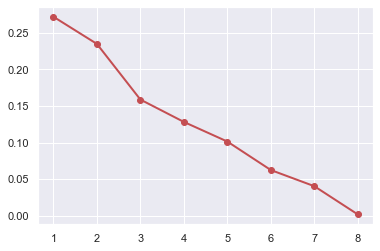

In [416]:
plt.plot(range(1,9), pca.explained_variance_ratio_, 'ro-', linewidth = 2)
plt.show

In [403]:
### We can also standarzie the data manually and follow the same method
### df_train_standardized = (df_train - df_train.mean()) / df_train.std()

In [385]:
final_train_df.describe()

,PCA_1,PCA_2,PCA_3,PCA_4,PCA_5,PCA_6,PCA_7,PCA_8,type
count,1.490000e+02,1.490000e+02,1.490000e+02,1.490000e+02,1.490000e+02,1.490000e+02,1.490000e+02,1.490000e+02,149.000000
mean,1.788279e-17,1.490232e-18,-9.239440e-17,1.043163e-17,2.384372e-17,4.358929e-17,-4.377557e-17,-1.052477e-17,2.765101
std,1.599140e+00,1.444869e+00,1.219734e+00,1.030280e+00,9.620792e-01,7.083420e-01,6.145538e-01,2.450656e-01,2.096939
min,-4.865733e+00,-1.957712e+00,-5.352857e+00,-2.673528e+00,-2.946804e+00,-2.975259e+00,-1.528467e+00,-9.786003e-01,1.000000
25%,-6.430579e-01,-9.545896e-01,-3.945262e-01,-5.432345e-01,-6.861336e-01,-3.668858e-01,-2.873590e-01,-1.014914e-01,1.000000
50%,-8.471418e-02,-6.019735e-01,-2.121597e-03,-8.450693e-02,3.595491e-01,-1.101253e-01,2.963287e-04,-1.196169e-02,2.000000
75%,6.009645e-01,5.506790e-01,3.098549e-01,5.095532e-01,6.722224e-01,2.652581e-01,2.804781e-01,9.505722e-02,3.000000
max,6.940261e+00,5.810608e+00,8.088580e+00,3.584965e+00,3.256990e+00,4.239165e+00,2.854289e+00,1.166480e+00,7.000000


# CODE BELOW POTENTIALLY NOT RELEVANT 

Using ScandardScaler should also normalize the data --> Check with TA before deleting

In [408]:
### Should we also normalize the data prior to PCA? (some features might be interpreted as more important)
### Let's try and see the difference!

x_normalized = preprocessing.normalize(x)

In [409]:
x_norm_stad = StandardScaler().fit_transform(x_normalized)

In [410]:
PrincipalComponenets_norm = pca.fit_transform(x_norm_stad)

In [411]:
Principal_Train_DF_norm = pd.DataFrame(data = PrincipalComponenets_norm, columns = ['PCA_1','PCA_2','PCA_3','PCA_4','PCA_5','PCA_6','PCA_7','PCA_8'])

In [412]:
final_train_df_norm = pd.concat([Principal_Train_DF_norm, df_train['type']], axis= 1)

In [413]:
final_train_df_norm

,PCA_1,PCA_2,PCA_3,PCA_4,PCA_5,PCA_6,PCA_7,PCA_8,type
0,-1.472116,-0.904034,1.222045,-0.621330,-2.243306,0.701501,-0.018432,-0.041097,2
1,0.789509,-0.734137,0.883523,0.273542,-0.680222,0.825212,-0.321474,-0.237496,2
2,-0.418399,0.860842,0.400953,0.907661,0.558999,-0.023639,-0.744432,0.081970,2
3,2.516598,-4.009705,-0.112183,-2.926378,1.773596,-0.559622,0.615964,0.414086,2
4,0.411414,-1.503008,0.321489,1.720297,0.594337,-0.412261,0.299272,-0.020439,1
...,...,...,...,...,...,...,...,...,...
144,-1.327067,-0.137096,-0.484668,-0.472532,0.712862,-0.474678,0.302307,-0.045365,1
145,-0.486214,-0.008901,1.028038,0.973656,-0.731247,0.332186,-0.583525,0.070812,2
146,3.875180,1.213211,1.267256,3.291134,-0.724767,-0.666144,0.980080,-0.172434,7
147,-1.803628,0.036694,0.303789,-1.111461,-1.374827,0.411489,-0.206560,0.063456,1


In [414]:
pca.explained_variance_ratio_

array([0.27196649, 0.23483898, 0.1587669 , 0.12821418, 0.10139125,
       0.0624575 , 0.04038063, 0.00180104])